**Reading MRI Dicom Files**

Seguindo os conceitos mostrados no notebook anterior, aqui vamos demonstrar como processar uma série dicom de um exame de RM. MRI significa Imagem por Ressonância Magnética e é um exame médico que se concentra em identificar diferentes aspectos do corpo humano quando comparado à tomografia computadorizada e ao raio-x. Neste notebook, no entanto, queremos apenas explorar as diferenças práticas entre uma ressonância magnética e uma tomografia computadorizada na perspectiva do manuseio de dicom. Aqui usaremos o estudo de ressonância magnética dos conjuntos de dados de ressonância magnética estrutural, disponíveis na base do Kaggle https://www.kaggle.com/datasets/ilknuricke/neurohackinginrimages.

Iniciaremos este notebook carregando o módulo utils.py revisado desenvolvido no notebook anterior.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -q condacolab
import condacolab
condacolab.install_miniconda()
!conda install -c conda-forge gdcm
!pip install pydicom==2.0.0

from google.colab import drive
drive.mount('/content/drive')

!find "drive/MyDrive/Curso IA para Medicina - Cientista de Dados/1. Introdução Imagens Médicas/Dicom Hands-On/modules/" -name "*.py" -exec cp {} ./ \;

⏬ Downloading https://repo.anaconda.com/miniconda/Miniconda3-py37_4.9.2-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:24
🔁 Restarting kernel...
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - gdcm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |            2_gnu          23 KB  conda-forge
    ca-certificates-2021.10.8  |       ha878542_0         139 KB  conda-forge
    cert

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

import utils_pt4 as utils

Vamos agora carregar algumas das tags dicom em um dataframe usando o get_valid_files_in_folder.

In [3]:
MRI_FOLDER = 'drive/MyDrive/Curso IA para Medicina - Cientista de Dados/1. Introdução Imagens Médicas/Dicom Hands-On/MRI_example/'

dicom_fields = { 'SOPInstanceUID':{'mandatory':True},
                  'SeriesInstanceUID':{'mandatory':True},
                  'SeriesDescription':{'mandatory':False},
                  'StudyInstanceUID':{'mandtory':True},
                  'InstanceNumber':{'mandatory':True},
                  'AccessionNumber':{'mandatory':False},
                  'PatientID':{'mandatory':False},
                  'ImagePositionPatient':{'madatory':True}
                }

df = utils.get_valid_files_in_folder(MRI_FOLDER, dicom_fields)
df

'mandatory'
'mandatory'
'mandatory'
'mandatory'
'mandatory'
'mandatory'
'mandatory'
File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.
'mandatory'
'mandatory'
'mandatory'
'mandatory'
'mandatory'
'mandatory'
'mandatory'
'mandatory'
'mandatory'
'mandatory'
'mandatory'
'mandatory'
'mandatory'
'mandatory'
'mandatory'
'mandatory'
'mandatory'
'mandatory'
'mandatory'
'mandatory'
'mandatory'
'mandatory'
File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.


,SOPInstanceUID,SeriesInstanceUID,SeriesDescription,StudyInstanceUID,InstanceNumber,AccessionNumber,PatientID,ImagePositionPatient,path


In [4]:
MRI_FOLDER = 'drive/MyDrive/Curso IA para Medicina - Cientista de Dados/1. Introdução Imagens Médicas/Dicom Hands-On/MRI_example/'

dicom_fields = {   'SOPInstanceUID':{'mandatory':True},
                    'SeriesInstanceUID':{'mandatory':True},
                    'SeriesDescription':{'mandatory':False},
                    'StudyInstanceUID':{'mandatory':True},
                    'InstanceNumber':{'mandatory':True},
                    'AccessionNumber':{'mandatory':False},
                    'PatientID':{'mandatory':False},
                    'ImagePositionPatient':{'mandatory':True}
                }

df = utils.get_valid_files_in_folder(MRI_FOLDER, dicom_fields)
df

File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.
File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.
File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.


,SOPInstanceUID,SeriesInstanceUID,SeriesDescription,StudyInstanceUID,InstanceNumber,AccessionNumber,PatientID,ImagePositionPatient,path
0,1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006...,1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006...,sT2/TSE/T,2.16.840.1.113669.632.20.1211.10000357775,2,0,5Yp0E,"[-118.35154324932, -118.43980056138, 77.734430...",drive/MyDrive/Curso IA para Medicina - Cientis...
1,1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006...,1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006...,sT2/TSE/T,2.16.840.1.113669.632.20.1211.10000357775,22,0,5Yp0E,"[-115.48045993014, -109.79641562790, -41.91944...",drive/MyDrive/Curso IA para Medicina - Cientis...
2,1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006...,1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006...,sT2/TSE/T,2.16.840.1.113669.632.20.1211.10000357775,20,0,5Yp0E,"[-115.76756829186, -110.66075450272, -29.95405...",drive/MyDrive/Curso IA para Medicina - Cientis...
3,1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006...,1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006...,sT2/TSE/T,2.16.840.1.113669.632.20.1211.10000357775,4,0,5Yp0E,"[-118.06443506642, -117.57546216340, 65.769037...",drive/MyDrive/Curso IA para Medicina - Cientis...
4,1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006...,1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006...,sT2/TSE/T,2.16.840.1.113669.632.20.1211.10000357775,10,0,5Yp0E,"[-117.20311004086, -114.98244664163, 29.872877...",drive/MyDrive/Curso IA para Medicina - Cientis...
...,...,...,...,...,...,...,...,...,...
61,1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006...,1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006...,sT2W/FLAIR,2.16.840.1.113669.632.20.1211.10000357775,22,0,5Yp0E,"[-115.48045897839, -109.79641467671, -41.91944...",drive/MyDrive/Curso IA para Medicina - Cientis...
62,1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006...,1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006...,sT2W/FLAIR,2.16.840.1.113669.632.20.1211.10000357775,9,0,5Yp0E,"[-117.34666329977, -115.41461491923, 35.855573...",drive/MyDrive/Curso IA para Medicina - Cientis...
63,1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006...,1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006...,sT2W/FLAIR,2.16.840.1.113669.632.20.1211.10000357775,16,0,5Yp0E,"[-116.34178406355, -112.38943034748, -6.023282...",drive/MyDrive/Curso IA para Medicina - Cientis...
64,1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006...,1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006...,sT2W/FLAIR,2.16.840.1.113669.632.20.1211.10000357775,10,0,5Yp0E,"[-117.20310908911, -114.98244569043, 29.872877...",drive/MyDrive/Curso IA para Medicina - Cientis...


Este conjunto de dados contém um único estudo de RM, que é uma coleção de diferentes séries obtidas durante a mesma sessão (como mencionamos na parte 2). Até agora, todos os estudos que mostramos tinham uma única série. Esta será uma boa oportunidade para explorar um caso de estudo com várias séries.

Primeiro, vamos apenas verificar se realmente temos apenas um único estudo:

In [5]:
df['StudyInstanceUID'].unique()

array(['2.16.840.1.113669.632.20.1211.10000357775'], dtype=object)

Agora, vamos contar o número de séries associadas a este estudo:

In [6]:
df['SeriesInstanceUID'].unique()

array(['1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006120114262848496',
       '1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006120114333440565',
       '1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006120114285654497'],
      dtype=object)

Vamos agora abrir um arquivo dicom de MRI aleatório e imprimir todas as suas tags e ver o que é diferente dos arquivos dicom explorados até agora:

In [7]:
series = '1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006120114262848496'
df_ser = df[df['SeriesInstanceUID'] == series]
path = df_ser['path'].to_list()[0]
dcm = utils.read_dicom(path)
dcm

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 210
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006120114290285508
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7238010.5.0.3.5.4
(0002, 0013) Implementation Version Name         SH: 'OSIRIX'
(0002, 0016) Source Application Entity Title     AE: 'OSIRIX'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_SE', 'M', 'SE']
(0008, 0012) Instance Creation Date              DA: '20061201'
(0008, 0013) Instance Creation Time              TM: '145313.000000'
(0008, 0014) I

Aqui podemos ver que o arquivo dicom tem os parâmetros WindowCenter e WindowWidth, mas falta o RescaleSlope e RescaleIntercept. Mais uma vez, isso mostra a importância de alterar a função **get_dicom_img** para funcionar com um arquivo dicom sem nenhuma dessas quatro tags dicom.

Em relação à matriz de pixels de um arquivo dicom de ressonância magnética, também é diferente quando comparado a uma tomografia computadorizada ou raio-x. Isso se deve à interpretação física diferente do valor de intensidade de cada pixel (que não abordaremos aqui). Os valores de intensidade de uma imagem de ressonância magnética não são bem definidos, o que significa que cada imagem pode ter um intervalo diferente, semelhante a uma tomografia computadorizada. Por exemplo, vamos ver o intervalo do arquivo dicom aleatório que carregamos:

In [8]:
img = dcm.pixel_array
print(f'min max img value = ({np.min(img)}, {np.max(img)})')

min max img value = (0, 666)


Por fim, vamos carregar as imagens usando as funções do módulo utils e plotar as vistas coronal, sagital e axial de cada série. Carregaremos as imagens dicom usando os parâmetros de janela padrão de cada arquivo dicom, mas observe que, da mesma forma que o raio-x e a tomografia computadorizada, podemos usar parâmetros de janela personalizados.

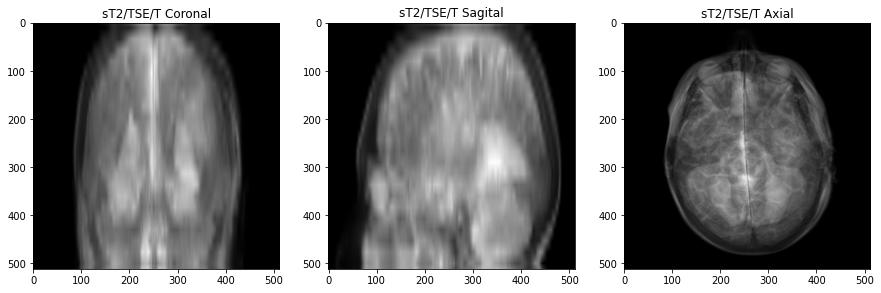

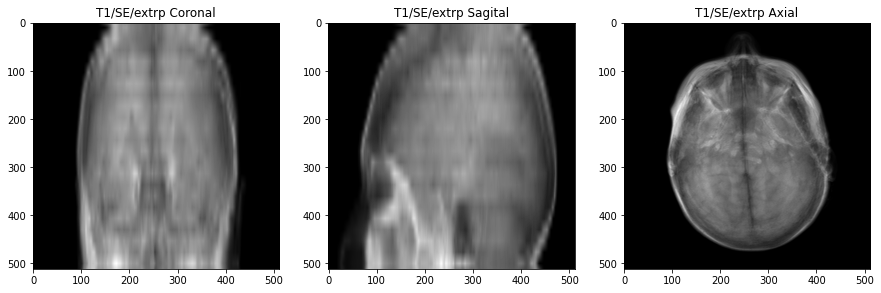

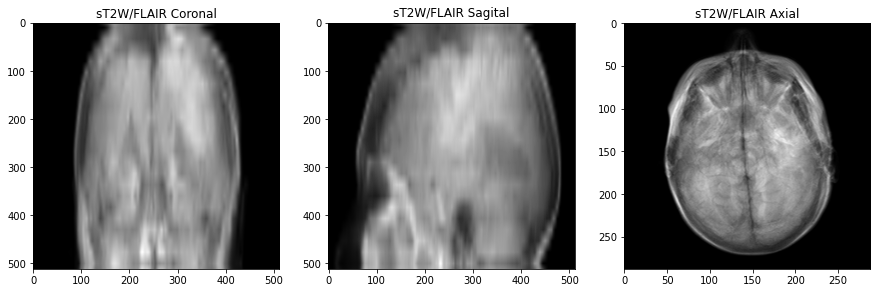

In [10]:
for series, series_desc in zip(df['SeriesInstanceUID'].unique(), df['SeriesDescription'].unique()):

  img3d = utils.get_series_arr(df, series)

  img_ax = np.mean(img3d, axis=0)
  img_cor = np.mean(img3d, axis=1)
  img_sag = np.mean(img3d, axis=2)

  img_cor = resize(img_cor, (512,512), preserve_range=True)
  img_sag = resize(img_sag, (512,512), preserve_range=True)

  f, axarr = plt.subplots(1, 3, figsize=(15,15))
  axarr[0].imshow(img_cor, cmap='gray')
  axarr[0].title.set_text(f'{series_desc} Coronal')
  axarr[1].imshow(img_sag, cmap='gray')
  axarr[1].title.set_text(f'{series_desc} Sagital')
  axarr[2].imshow(img_ax, cmap='gray')
  axarr[2].title.set_text(f'{series_desc} Axial')
